In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('movie_metadata.csv')
pd.set_option('display.max_columns', None)
df.head() # Loading the first five rows of the entire dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
print(df.shape)
df.info()

(5043, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-n

In [4]:
# Null Values present in the dataset
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
# Name all columns in the dataframe.
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [7]:
df['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Arabic           5
Danish           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Thai             3
Chinese          3
Icelandic        2
None             2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Panjabi          1
Urdu             1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: language, dtype: int64

In [8]:
# Names of all the Hindi Movies in the Dataset.
df.movie_title[df.language == 'Hindi']

1056                                 Earth 
3075                Kabhi Alvida Naa Kehna 
3085                             Housefull 
3208                                Krrish 
3276                      Jab Tak Hai Jaan 
3344                       My Name Is Khan 
3348                       Namastey London 
3350               Yeh Jawaani Hai Deewani 
3455                         Ta Ra Rum Pum 
3510                            Veer-Zaara 
3665                           Khiladi 786 
3685                       Rang De Basanti 
3695                         Dum Maaro Dum 
3789                     Gandhi, My Father 
3866                                 Fugly 
3870                               Airlift 
3877                                   Paa 
4088                                 Water 
4160                  Lage Raho Munna Bhai 
4299                Hum To Mohabbat Karega 
4305                        Roadside Romeo 
4351             ABCD (Any Body Can Dance) 
4385                          Th

In [9]:
# Saving the Hindi movies into a separate dataframe:
bw = df[df['language'] == 'Hindi']
bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1056,Color,Deepa Mehta,34.0,110.0,375.0,59.0,Gulshan Grover,113.0,528972.0,Drama|Romance|War,Nandita Das,Earth,5639,371,Eric Peterson,0.0,friend|hindu|india|muslim|sikh,http://www.imdb.com/title/tt0150433/?ref_=fn_t...,55.0,Hindi,India,Unrated,NaN,1998.0,102.0,7.8,NaN,522
3075,Color,Karan Johar,20.0,193.0,160.0,860.0,John Abraham,8000.0,3275443.0,Drama,Shah Rukh Khan,Kabhi Alvida Naa Kehna,13998,10822,Preity Zinta,2.0,extramarital affair|fashion magazine editor|ma...,http://www.imdb.com/title/tt0449999/?ref_=fn_t...,264.0,Hindi,India,R,700000000.0,2006.0,1000.0,6.0,2.35,659
3085,Color,Sajid Khan,10.0,144.0,0.0,119.0,Boman Irani,564.0,1165104.0,Comedy,Arjun Rampal,Housefull,8598,1121,Riteish Deshmukh,5.0,bad luck|casino|lie|mix up|stutter,http://www.imdb.com/title/tt1573072/?ref_=fn_t...,43.0,Hindi,India,NaN,NaN,2010.0,154.0,5.3,NaN,250
3208,Color,Rakesh Roshan,20.0,168.0,53.0,45.0,Rekha,307.0,NaN,Action|Adventure|Romance|Sci-Fi,Naseeruddin Shah,Krrish,12411,616,Sharat Saxena,0.0,breaking the fourth wall|breaking the fourth w...,http://www.imdb.com/title/tt0432637/?ref_=fn_t...,110.0,Hindi,India,Not Rated,10000000.0,2006.0,200.0,6.3,2.35,533
3276,Color,Yash Chopra,50.0,176.0,147.0,1000.0,Katrina Kaif,8000.0,3047539.0,Drama|Romance,Shah Rukh Khan,Jab Tak Hai Jaan,42296,13762,Vic Waghorn,4.0,accident|army|bomb|indian army|love,http://www.imdb.com/title/tt2176013/?ref_=fn_t...,286.0,Hindi,India,Not Rated,7217600.0,2012.0,3000.0,6.9,2.35,12000


In [10]:
score = bw.imdb_score[bw.imdb_score >= 7] # Storing movies' score with imdb score equal to or above 7.
name = bw.movie_title[bw.imdb_score >= 7] # Storing movies' name with imdb score equal to or above 7.
genre = bw.genres[bw.imdb_score >= 7] # Storing movies' genre with imdb score equal to or above 7.
movieratings = pd.concat([name, genre, score], axis = 1)
movieratings # Final concatenated dataframe of Indian Movies, their genres & IMDb Scores.

,movie_title,genres,imdb_score
1056,Earth,Drama|Romance|War,7.8
3344,My Name Is Khan,Adventure|Drama|Thriller,8.0
3348,Namastey London,Comedy|Drama|Romance,7.3
3510,Veer-Zaara,Drama|Musical|Romance,7.9
3685,Rang De Basanti,Comedy|Drama|History|Romance,8.4
3789,"Gandhi, My Father",Biography|Drama|History,7.4
3870,Airlift,Action|Drama|History|Thriller|War,8.5
3877,Paa,Comedy|Drama,7.2
4088,Water,Drama|Romance,7.8
4160,Lage Raho Munna Bhai,Comedy|Drama|Romance,8.2


***We observe that Indian Movies that have the genre of Action, Drama, History, Thriller or War will have a higher IMDb score.***

## Data Visualization:

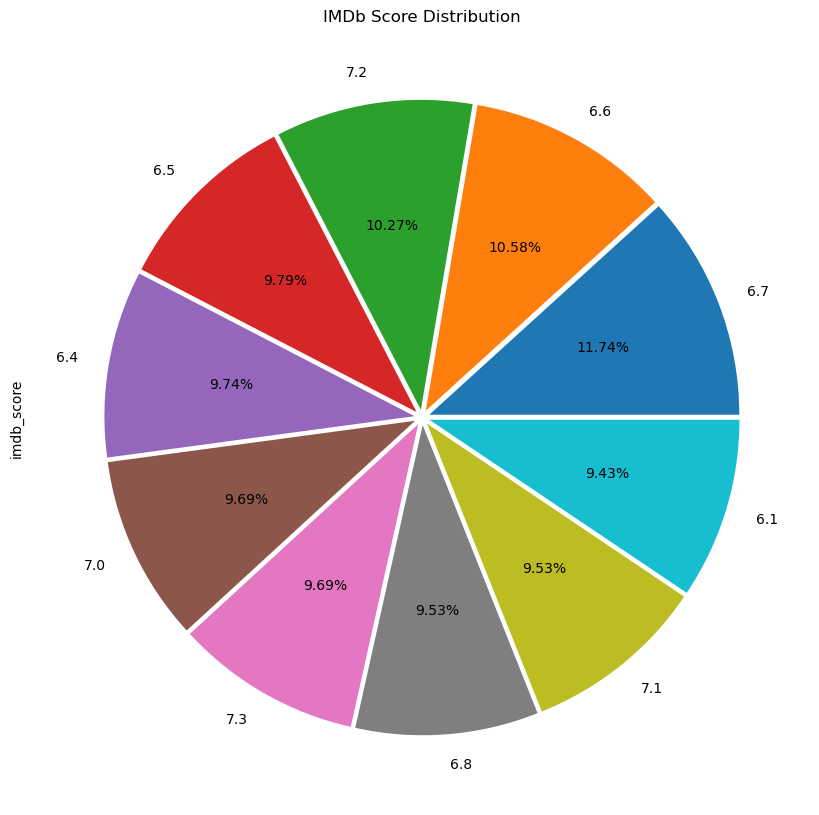

In [11]:
plt.figure(figsize = (10,20))
explode = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]
df['imdb_score'].value_counts(ascending=False).head(10).plot(kind = 'pie',autopct="%0.2f%%",explode=explode)
plt.title('IMDb Score Distribution')
plt.show()

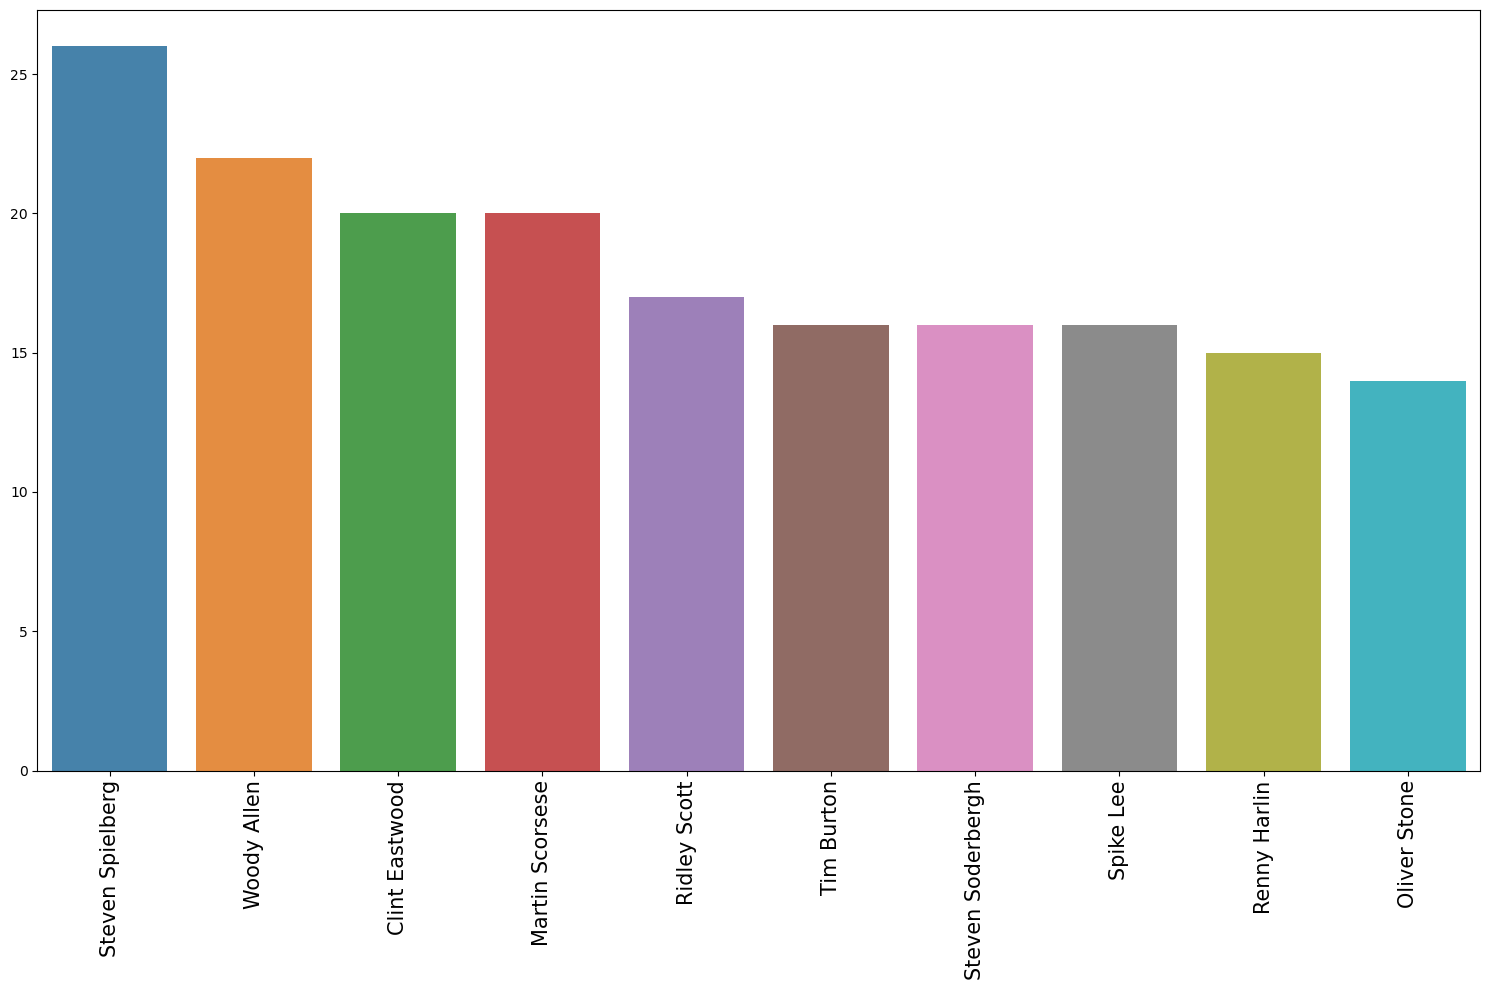

In [12]:
ls = df['director_name'].value_counts(ascending = False).head(10)
plt.figure(figsize = (15,10))
sns.barplot(ls.index, ls.values, alpha = 0.9)
plt.xticks(rotation = 90, fontsize=15)
plt.tight_layout()
plt.show()

In [13]:
df = df.dropna()
df.isnull().sum() # Removing the rows containing the null values from the dataframe.

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3756 non-null   object 
 1   director_name              3756 non-null   object 
 2   num_critic_for_reviews     3756 non-null   float64
 3   duration                   3756 non-null   float64
 4   director_facebook_likes    3756 non-null   float64
 5   actor_3_facebook_likes     3756 non-null   float64
 6   actor_2_name               3756 non-null   object 
 7   actor_1_facebook_likes     3756 non-null   float64
 8   gross                      3756 non-null   float64
 9   genres                     3756 non-null   object 
 10  actor_1_name               3756 non-null   object 
 11  movie_title                3756 non-null   object 
 12  num_voted_users            3756 non-null   int64  
 13  cast_total_facebook_likes  3756 non-null   int64

In [15]:
df = df.drop(columns = ['movie_imdb_link','color','movie_title','director_name', 'plot_keywords',
                    'actor_3_name','movie_imdb_link', 'genres','aspect_ratio','language', 'actor_2_name', 'actor_1_name'])
# Removing all the non-required columns from the dataframe.
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


In [16]:
df.shape

(3756, 17)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     3756 non-null   float64
 1   duration                   3756 non-null   float64
 2   director_facebook_likes    3756 non-null   float64
 3   actor_3_facebook_likes     3756 non-null   float64
 4   actor_1_facebook_likes     3756 non-null   float64
 5   gross                      3756 non-null   float64
 6   num_voted_users            3756 non-null   int64  
 7   cast_total_facebook_likes  3756 non-null   int64  
 8   facenumber_in_poster       3756 non-null   float64
 9   num_user_for_reviews       3756 non-null   float64
 10  country                    3756 non-null   object 
 11  content_rating             3756 non-null   object 
 12  budget                     3756 non-null   float64
 13  title_year                 3756 non-null   float

## One-Hot Encoding Categorical Data:

In [18]:
# One Hot & Label Encoding the categorical columns in the dataset and transformed them to numeric values.
cat_cols = ['content_rating','country']
df = pd.get_dummies(df, columns = cat_cols)
# le = OneHotEncoder()
# for i in cat_cols:
#     df[i] = pd.get_dummies
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,country_Afghanistan,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,24000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


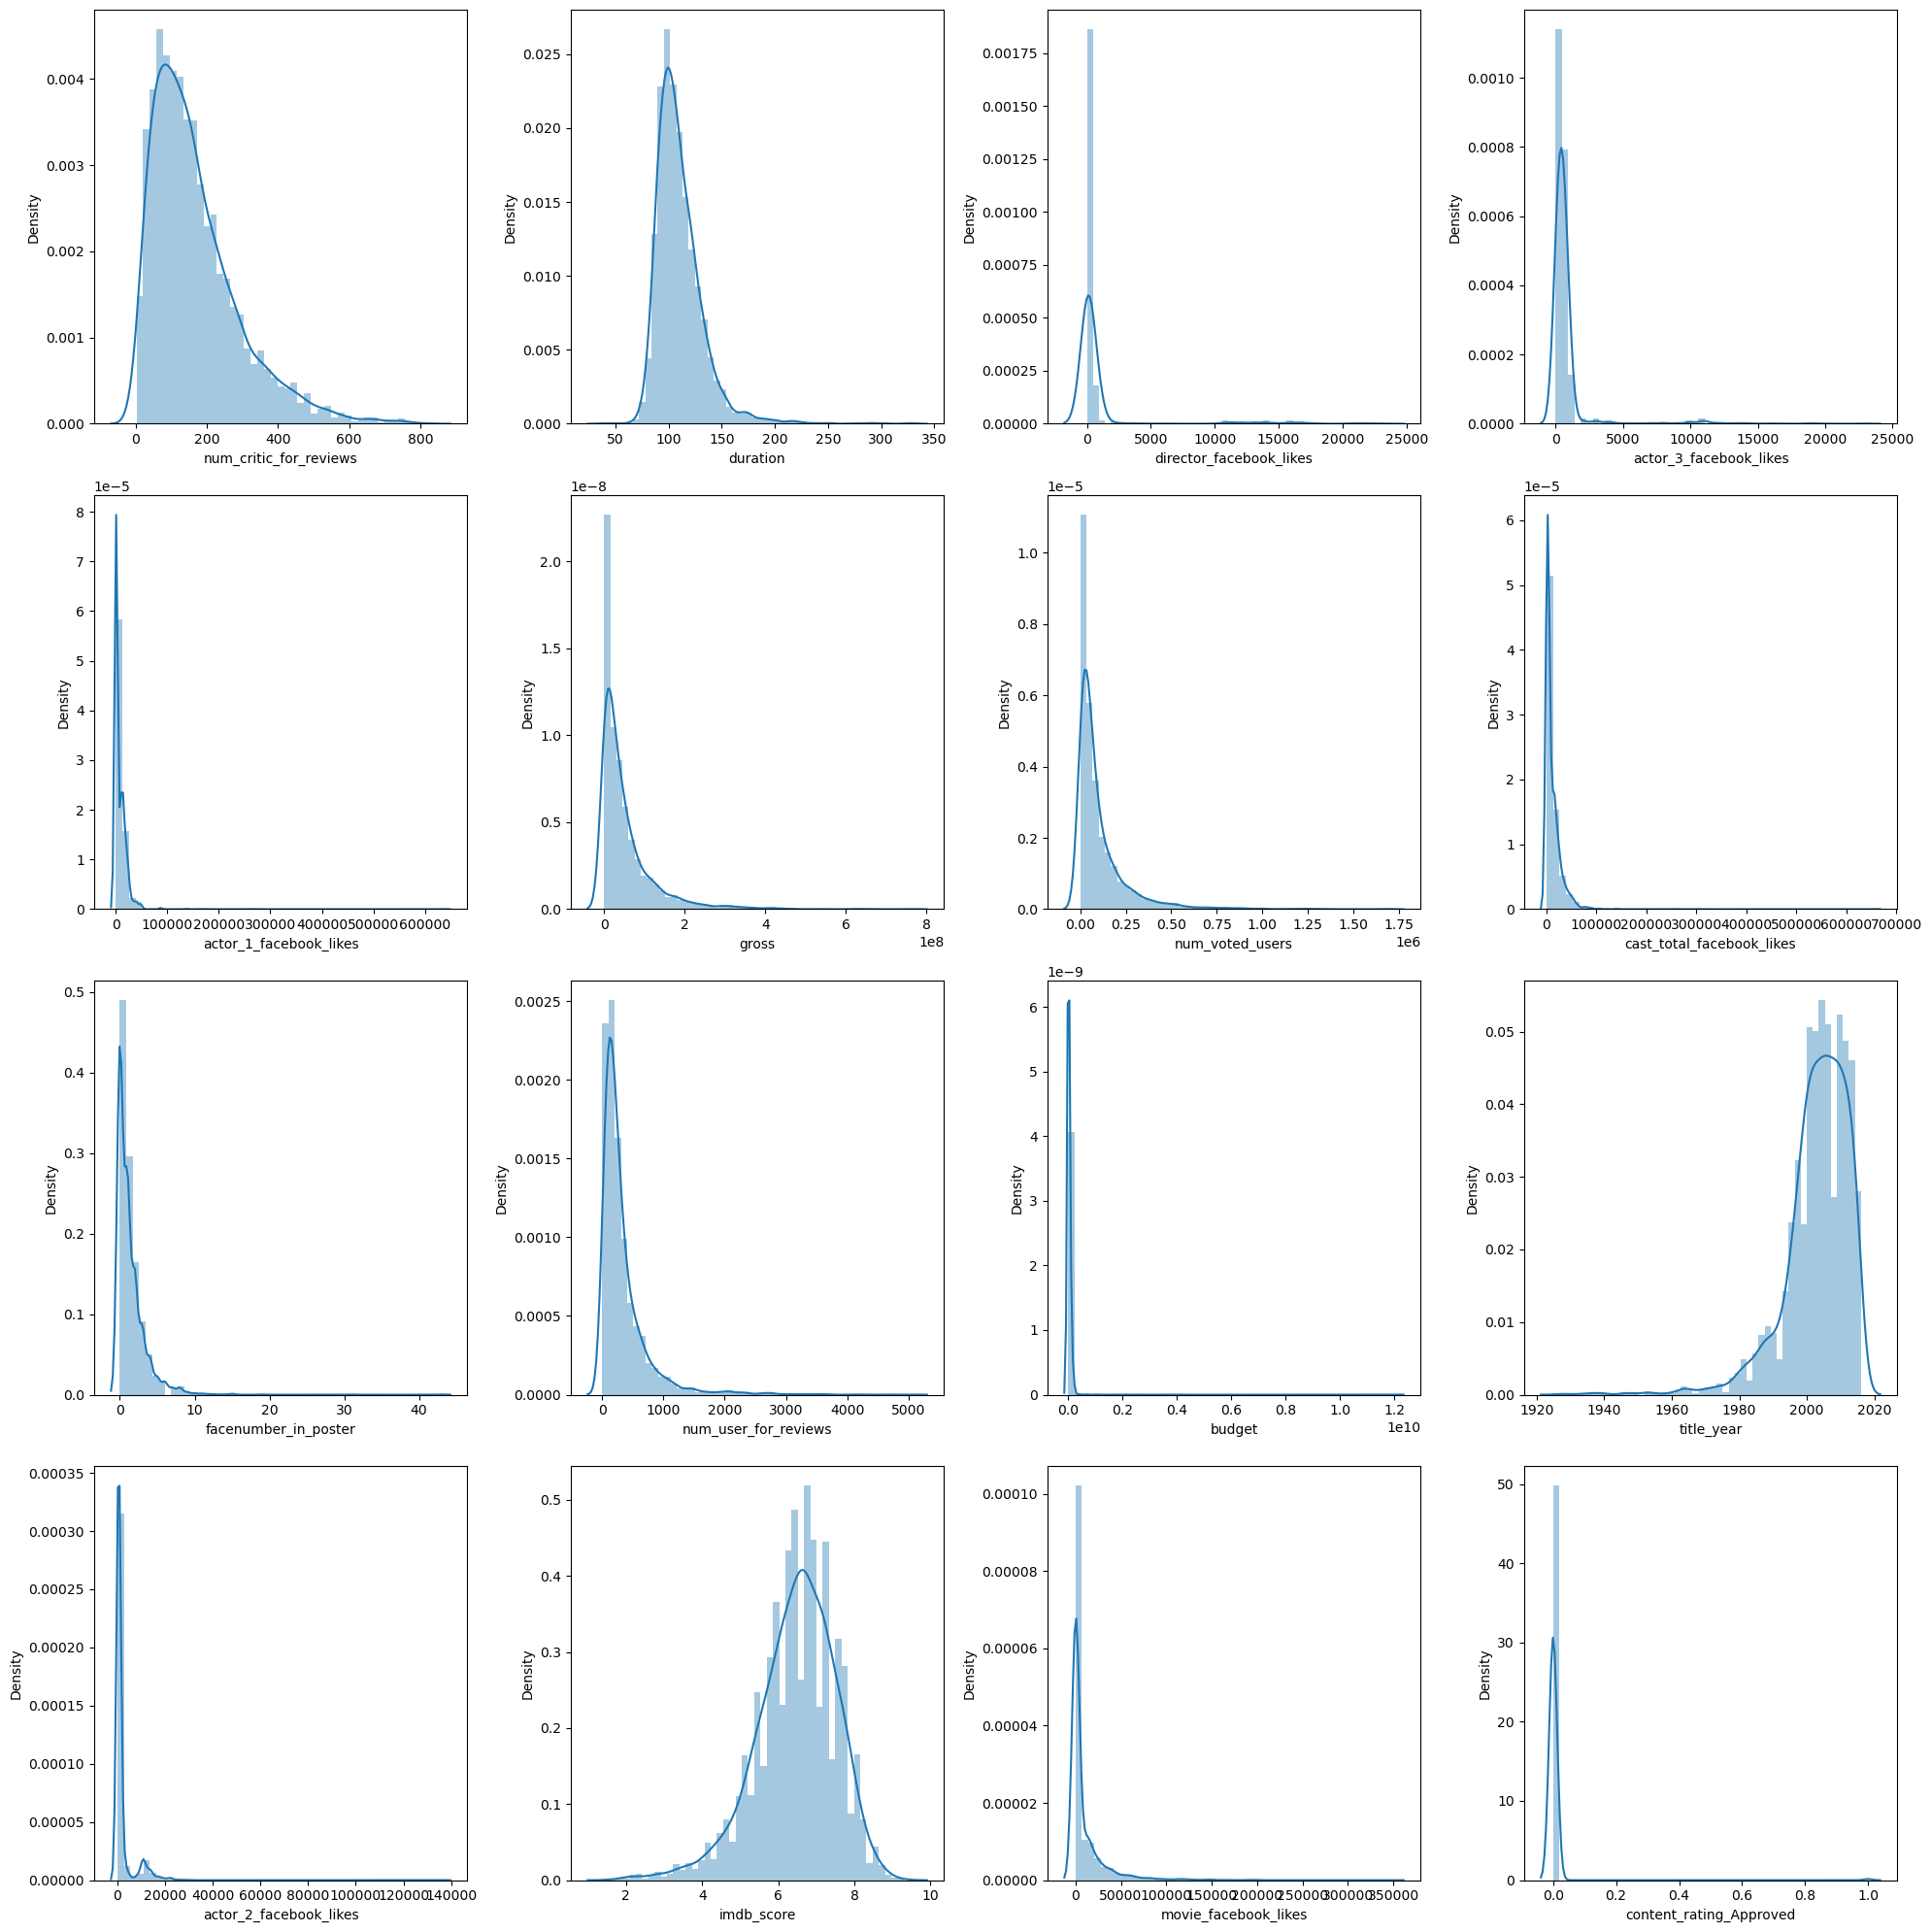

In [19]:
rows = 4
cols = 4
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,20))
col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index = index + 1
        
plt.tight_layout()

## Log Distribution:

In [20]:
# Applying log transformation on the skewed features
skewed_features = list(df.columns)
for i in skewed_features:
    df[i] = np.log(df[i] + 1)

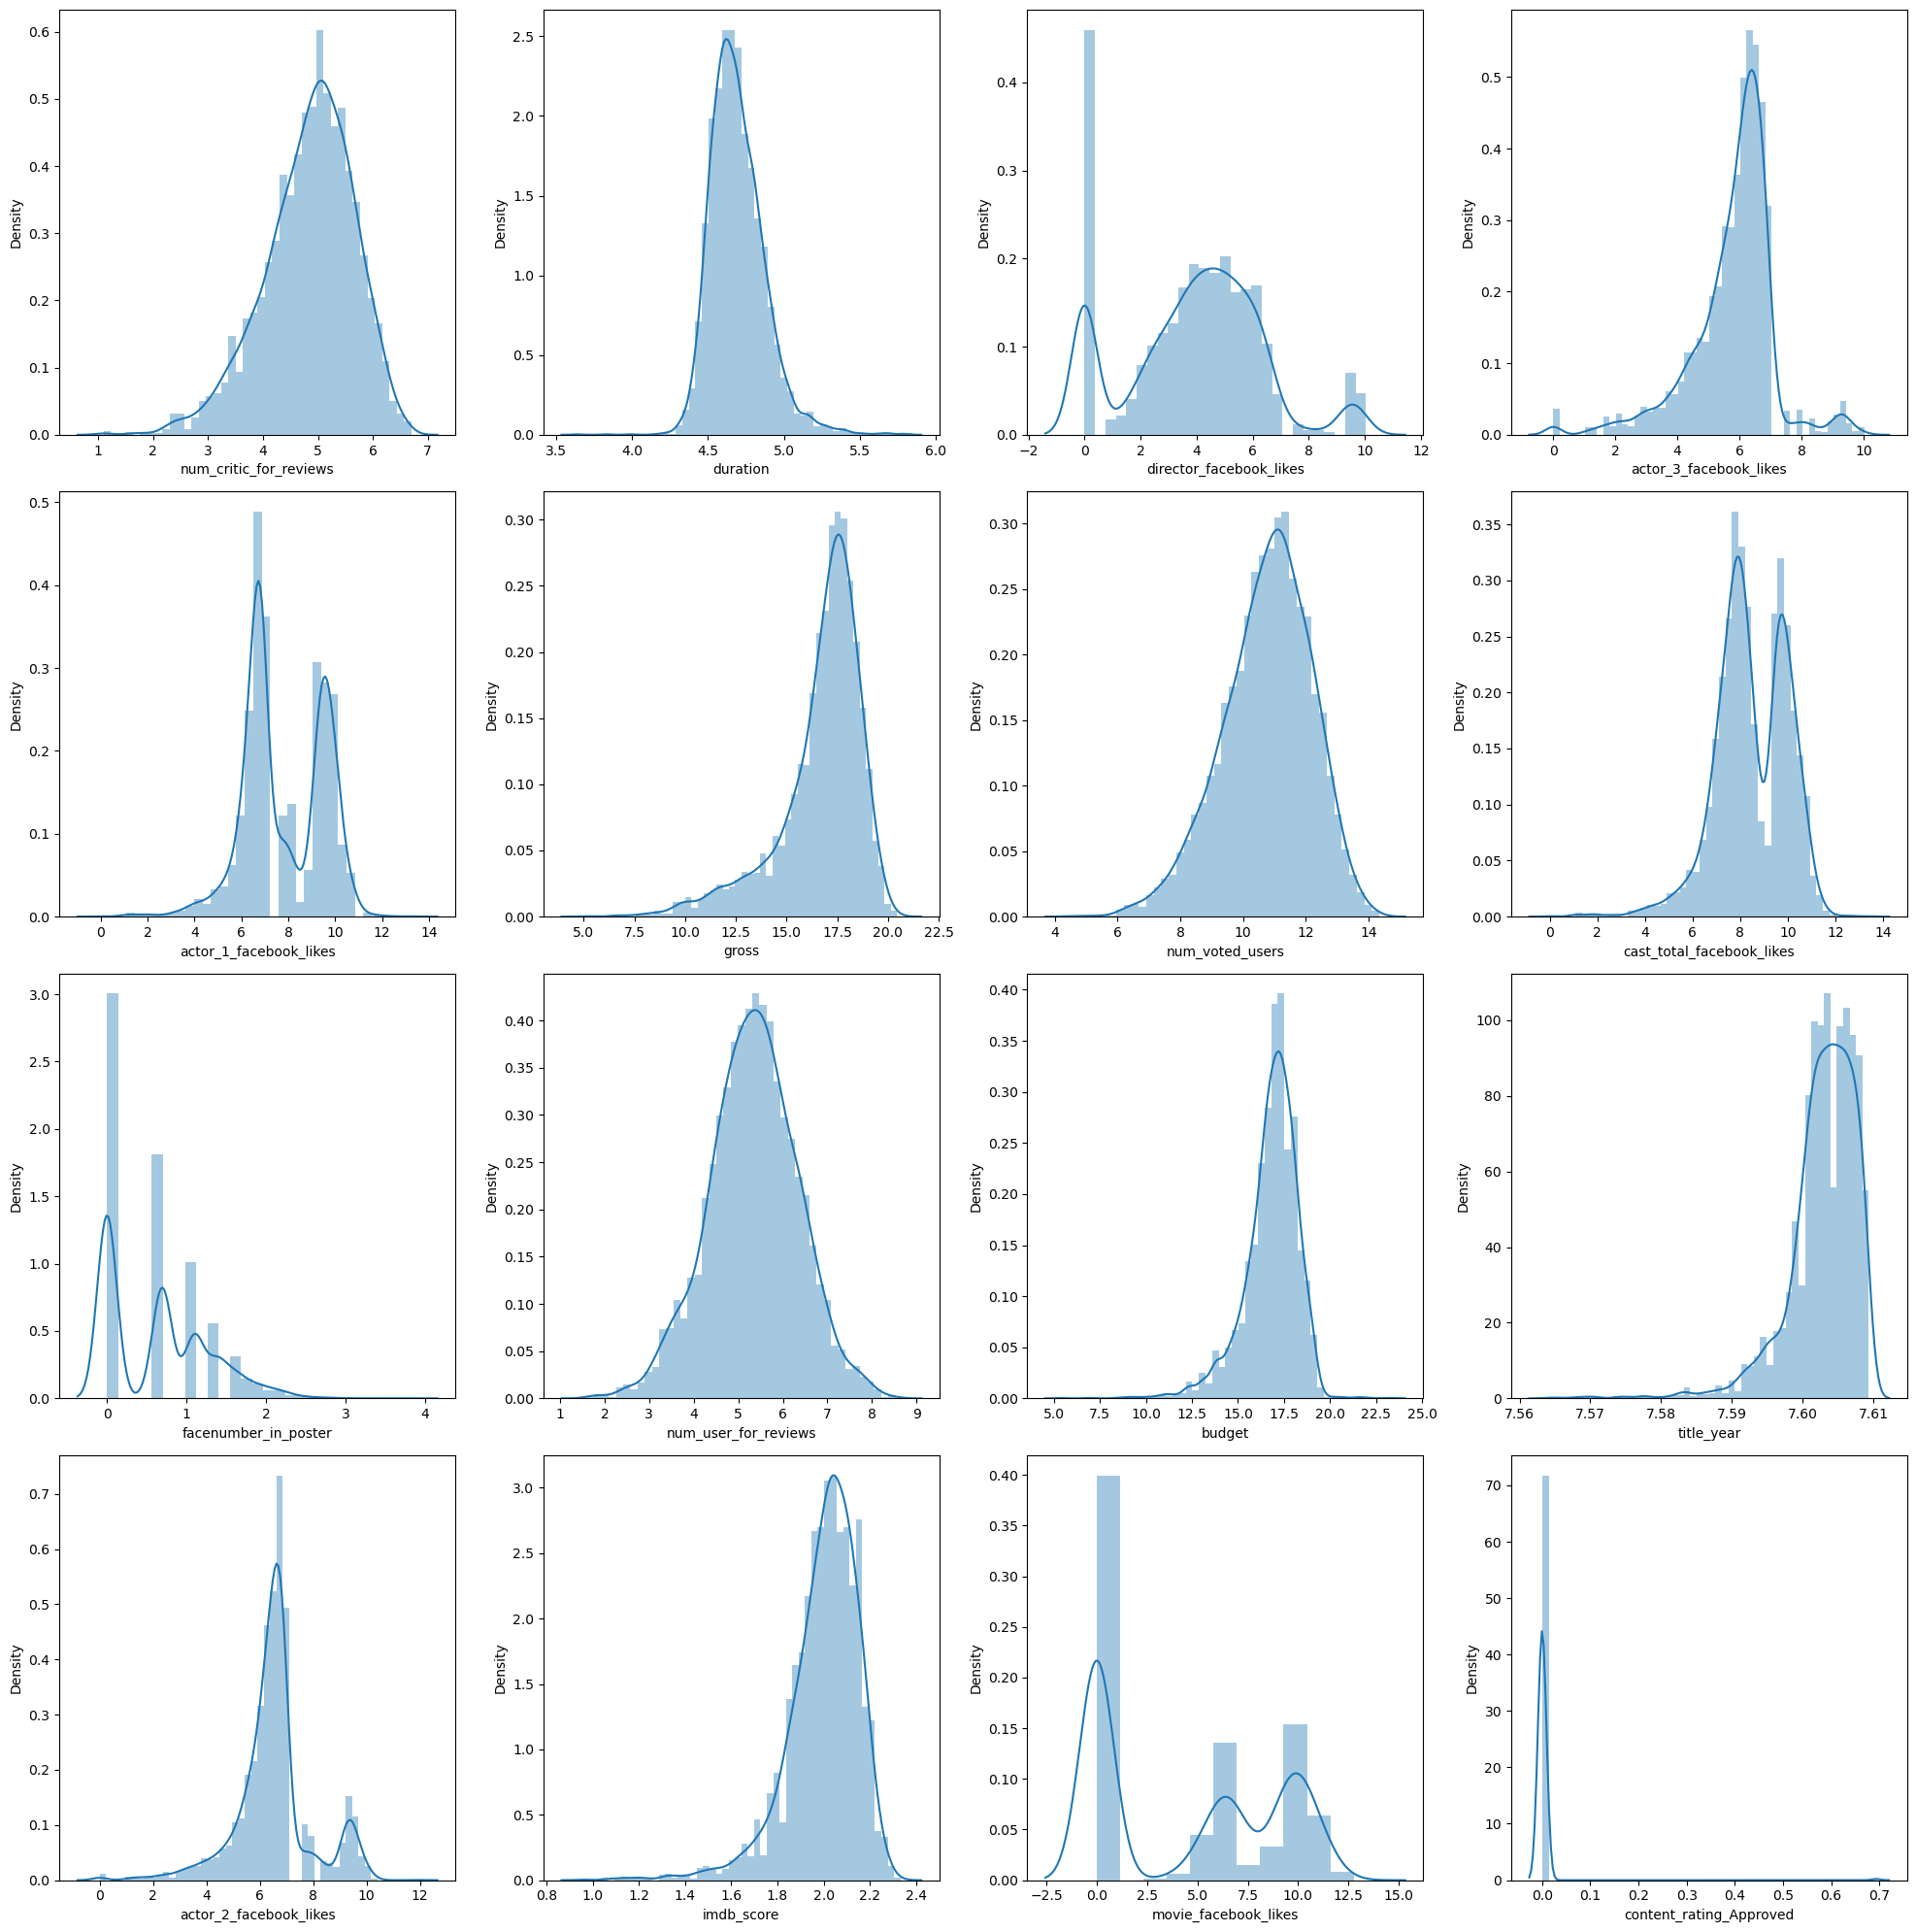

In [21]:
# Checking the changes in the distribution of data after applying log transformation.
rows = 4
cols = 4
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,20))
col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index = index + 1
        
plt.tight_layout()

## Splitting the Dataset:

In [22]:
# We first split the data into independent & dependent variables.
X = df.drop(labels = ['imdb_score'], axis = 1)
y = df['imdb_score']

In [23]:
# We then split the data into the training set & the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

## Machine Learning Algorithms:
### Linear Regression:

In [24]:
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

In [25]:
# Training Data Predictions:
train_pred = lm.predict(X_train)

# Testing Data Predictions:
test_pred = lm.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
RSq_train = lm.score(X_train, y_train)
RSq_test = lm.score(X_test, y_test)
print("RMSE Training Data:",str(RMSE_train))
print("RMSE Testing Data:",str(RMSE_test))
print('-'*70)
print('RSquared Value on Training Data:', RSq_train)
print('RSquared Value on Testing Data:', RSq_test)

RMSE Training Data: 0.11850942500003023
RMSE Testing Data: 0.11832567879489139
----------------------------------------------------------------------
RSquared Value on Training Data: 0.42660692755465124
RSquared Value on Testing Data: 0.4049737487785803


In [26]:
# Calculating errors to use in mean absolute percentage error:
errors = abs(test_pred - y_test)
# Calculating mean absolute percentage error (MAPE):
mape = 100 * (errors/y_test)
# Accuracy:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.5 %.


### Decision Tree Regressor:

In [27]:
DT = DecisionTreeRegressor(max_depth = 8)
DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [28]:
# Training Data Predictions:
train_pred = DT.predict(X_train)

# Testing Data Predictions:
test_pred = DT.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
RSq_train = DT.score(X_train, y_train)
RSq_test = DT.score(X_test, y_test)
print("RMSE Training Data:",str(RMSE_train))
print("RMSE Testing Data:",str(RMSE_test))
print('-'*70)
print('RSquared Value on Training Data:', RSq_train)
print('RSquared Value on Testing Data:', RSq_test)

RMSE Training Data: 0.09237266782606447
RMSE Testing Data: 0.12176116031801207
----------------------------------------------------------------------
RSquared Value on Training Data: 0.6516357075723791
RSquared Value on Testing Data: 0.3699200308058188


In [29]:
# Calculating errors to use in mean absolute percentage error:
errors = abs(test_pred - y_test)
# Calculating mean absolute percentage error (MAPE):
mape = 100 * (errors/y_test)
# Accuracy:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.52 %.


### Random Forest Regressor:

In [30]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
# Training Data Predictions:
train_pred = RF.predict(X_train)

# Testing Data Predictions:
test_pred = RF.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
RSq_train = RF.score(X_train, y_train)
RSq_test = RF.score(X_test, y_test)
print("RMSE Training Data:",str(RMSE_train))
print("RMSE Testing Data:",str(RMSE_test))
print('-'*70)
print('RSquared Value on Training Data:', RSq_train)
print('RSquared Value on Testing Data:', RSq_test)

RMSE Training Data: 0.04133327820716064
RMSE Testing Data: 0.10093955840126913
----------------------------------------------------------------------
RSquared Value on Training Data: 0.9302496546629274
RSquared Value on Testing Data: 0.5669870169939181


In [32]:
# Calculating errors to use in mean absolute percentage error:
errors = abs(test_pred - y_test)
# Calculating mean absolute percentage error (MAPE):
mape = 100 * (errors/y_test)
# Accuracy:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.22 %.


### K - Nearest Neighbours:

In [33]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [34]:
# Training Data Predictions:
train_pred = knn.predict(X_train)

# Testing Data Predictions:
test_pred = knn.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
RSq_train = knn.score(X_train, y_train)
RSq_test = knn.score(X_test, y_test)
print("RMSE Training Data:",str(RMSE_train))
print("RMSE Testing Data:",str(RMSE_test))
print('-'*70)
print('RSquared Value on Training Data:', RSq_train)
print('RSquared Value on Testing Data:', RSq_test)

RMSE Training Data: 0.10360947740170855
RMSE Testing Data: 0.12914641604533333
----------------------------------------------------------------------
RSquared Value on Training Data: 0.5617260822103913
RSquared Value on Testing Data: 0.2911687853961934


In [35]:
# Calculating errors to use in mean absolute percentage error:
errors = abs(test_pred - y_test)
# Calculating mean absolute percentage error (MAPE):
mape = 100 * (errors/y_test)
# Accuracy:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.13 %.


### Lasso Regression:

In [36]:
lasso = LassoCV(cv = 10)
lasso.fit(X_train, y_train)

LassoCV(cv=10)

In [37]:
# Training Data Predictions:
train_pred = lasso.predict(X_train)

# Testing Data Predictions:
test_pred = lasso.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
RSq_train = lasso.score(X_train, y_train)
RSq_test = lasso.score(X_test, y_test)
print("RMSE Training Data:",str(RMSE_train))
print("RMSE Testing Data:",str(RMSE_test))
print('-'*70)
print('RSquared Value on Training Data:', RSq_train)
print('RSquared Value on Testing Data:', RSq_test)

RMSE Training Data: 0.12043039609405214
RMSE Testing Data: 0.11659434626192366
----------------------------------------------------------------------
RSquared Value on Training Data: 0.4078675127877406
RSquared Value on Testing Data: 0.42225911739471456


In [38]:
# Calculating errors to use in mean absolute percentage error:
errors = abs(test_pred - y_test)
# Calculating mean absolute percentage error (MAPE):
mape = 100 * (errors/y_test)
# Accuracy:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.55 %.


### ElasticNet:

In [39]:
en = ElasticNetCV(cv = 10)
en.fit(X_train, y_train)

ElasticNetCV(cv=10)

In [40]:
# Training Data Predictions:
train_pred = en.predict(X_train)

# Testing Data Predictions:
test_pred = en.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
RSq_train = en.score(X_train, y_train)
RSq_test = en.score(X_test, y_test)
print("RMSE Training Data:",str(RMSE_train))
print("RMSE Testing Data:",str(RMSE_test))
print('-'*70)
print('RSquared Value on Training Data:', RSq_train)
print('RSquared Value on Testing Data:', RSq_test)

RMSE Training Data: 0.12042735023934707
RMSE Testing Data: 0.11659711420155222
----------------------------------------------------------------------
RSquared Value on Training Data: 0.4078974641417764
RSquared Value on Testing Data: 0.4222316860326093


In [41]:
# Calculating errors to use in mean absolute percentage error:
errors = abs(test_pred - y_test)
# Calculating mean absolute percentage error (MAPE):
mape = 100 * (errors/y_test)
# Accuracy:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.55 %.


### XG-Boost Regressor:

In [42]:
xgbr = xgb.XGBRegressor()
xgbr = xgbr.fit(X_train, y_train)

In [43]:
# Training Data Predictions:
train_pred = xgbr.predict(X_train)

# Testing Data Predictions:
test_pred = xgbr.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
RSq_train = xgbr.score(X_train, y_train)
RSq_test = xgbr.score(X_test, y_test)
print("RMSE Training Data:",str(RMSE_train))
print("RMSE Testing Data:",str(RMSE_test))
print('-'*70)
print('RSquared Value on Training Data:', RSq_train)
print('RSquared Value on Testing Data:', RSq_test)

RMSE Training Data: 0.021986850878344573
RMSE Testing Data: 0.10105780596078691
----------------------------------------------------------------------
RSquared Value on Training Data: 0.9802633826343939
RSquared Value on Testing Data: 0.5659719002152244


In [44]:
# Calculating errors to use in mean absolute percentage error:
errors = abs(test_pred - y_test)
# Calculating mean absolute percentage error (MAPE):
mape = 100 * (errors/y_test)
# Accuracy:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.24 %.
